In [1]:
import pandas as pd

In [2]:
!pwd

/Users/hraj/Documents/Erdos/erdos-may-2024-imputing-data/ChallengeDataSet


In [3]:
X_train = pd.read_csv("/Users/hraj/Documents/Erdos/erdos-may-2024-imputing-data/ChallengeDataSet/input_training_imet9ZU.csv")
y_train = pd.read_csv("/Users/hraj/Documents/Erdos/erdos-may-2024-imputing-data/ChallengeDataSet/output_training_yCN1f2d.csv")

In [4]:
X_test = pd.read_csv("/Users/hraj/Documents/Erdos/erdos-may-2024-imputing-data/ChallengeDataSet/input_test_4AhEauI.csv")

In [5]:
X_train.head()

,ID,dt_close,product_id,liquidity_rank,normal_trading_day,dt_expiry,open,high,low,close,open_interest,volume,tick_size,fixed
0,0,8862,401920,0,1,8952,2710.0,2721.0,2624.0,2635.0,2814,402,11,0
1,1,8862,401920,1,1,8995,2610.0,2638.0,2547.0,2560.0,905,107,11,0
2,2,8862,401920,2,1,9039,2530.0,2550.0,2468.0,2478.0,719,41,11,0
3,3,8862,401920,3,1,9104,2497.0,2508.0,2437.0,2443.0,466,25,11,0
4,4,8862,401920,4,1,9213,2474.0,2505.0,2443.0,2452.0,286,11,11,0


In [7]:
y_train.head()

,ID,spread
0,0,2.552161
1,1,3.575163
2,2,5.351175
3,3,5.285281
4,4,9.712062


In [6]:
len(X_train.product_id.unique())

104

There 104 distinct products for which we need to learn the correlation between the given covariates and the bid-ask spread values

In [12]:
X_test.head()

,ID,dt_close,product_id,liquidity_rank,normal_trading_day,dt_expiry,open,high,low,close,open_interest,volume,tick_size,fixed
0,1977,8868,102103552,0,1,8879,9299.0,9461.0,9087.000,9407.0,2844,3033,11,0
1,1978,8868,102103552,1,1,8901,9279.0,9442.0,9075.999,9391.0,2344,844,11,0
2,1979,8868,102103552,2,1,8924,9196.0,9420.0,9068.000,9374.0,757,358,11,0
3,1980,8868,102103552,3,1,8946,9174.0,9391.0,9050.000,9359.0,655,293,11,0
4,1981,8868,102103552,4,1,8966,9153.0,9372.0,9042.000,9346.0,314,138,11,0


In [11]:
len(X_test)

230304

We need to predict 230304 missing bid-ask spread values 

In [13]:
len(X_test.product_id.unique())

102

there are 104 different products in the training dataset and 102 different products in the test dataset

In [20]:
import numpy as np

In [23]:
sum(np.array(X_train.ID) - np.array(y_train.ID))

0

In [25]:
train_dataset = X_train.copy()

In [27]:
train_dataset["spread"] = y_train["spread"]
train_dataset.head()

,ID,dt_close,product_id,liquidity_rank,normal_trading_day,dt_expiry,open,high,low,close,open_interest,volume,tick_size,fixed,spread
0,0,8862,401920,0,1,8952,2710.0,2721.0,2624.0,2635.0,2814,402,11,0,2.552161
1,1,8862,401920,1,1,8995,2610.0,2638.0,2547.0,2560.0,905,107,11,0,3.575163
2,2,8862,401920,2,1,9039,2530.0,2550.0,2468.0,2478.0,719,41,11,0,5.351175
3,3,8862,401920,3,1,9104,2497.0,2508.0,2437.0,2443.0,466,25,11,0,5.285281
4,4,8862,401920,4,1,9213,2474.0,2505.0,2443.0,2452.0,286,11,11,0,9.712062


In [104]:
sample_train_dataset = train_dataset[train_dataset["product_id"] == 401920].copy()
sample_train_dataset = sample_train_dataset.reset_index().drop(columns=['index'])
sample_train_dataset.head(30)

,ID,dt_close,product_id,liquidity_rank,normal_trading_day,dt_expiry,open,high,low,close,open_interest,volume,tick_size,fixed,spread
0,0,8862,401920,0,1,8952,2710.0,2721.0,2624.0,2635.0,2814,402,11,0,2.552161
1,1,8862,401920,1,1,8995,2610.0,2638.0,2547.0,2560.0,905,107,11,0,3.575163
2,2,8862,401920,2,1,9039,2530.0,2550.0,2468.0,2478.0,719,41,11,0,5.351175
3,3,8862,401920,3,1,9104,2497.0,2508.0,2437.0,2443.0,466,25,11,0,5.285281
4,4,8862,401920,4,1,9213,2474.0,2505.0,2443.0,2452.0,286,11,11,0,9.712062
5,5,8862,401920,5,1,9256,2451.0,2460.0,2404.0,2414.0,58,4,11,0,8.850000
6,253,8863,401920,0,1,8952,2671.0,2709.0,2659.0,2686.0,2496,306,11,0,3.561657
7,254,8863,401920,1,1,8995,2604.0,2626.0,2584.0,2605.0,771,82,11,0,2.903020
8,255,8863,401920,2,1,9039,2500.0,2540.0,2500.0,2519.0,618,48,11,0,4.811636
9,256,8863,401920,3,1,9104,2475.0,2505.0,2474.0,2479.0,398,24,11,0,6.117450


In [88]:
len(sample_train_dataset.spread)

10566

In [89]:
sample_train_dataset.spread.mean()

1.830974605068884

In [90]:
sample_train_dataset.spread.std()

0.9250824549500495

In [101]:
sample_train_dataset[sample_train_dataset["liquidity_rank"]==0][:].reset_index().spread

0       2.552161
1       3.561657
2       1.999876
3       2.309278
4       1.492712
          ...   
1756    1.090019
1757    1.153756
1758    1.222061
1759    1.338957
1760    1.506203
Name: spread, Length: 1761, dtype: float64

<Axes: >

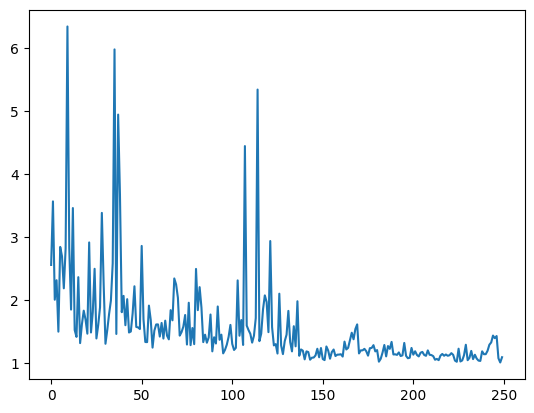

In [103]:
sample_train_dataset[sample_train_dataset["liquidity_rank"]==0][:250].reset_index().spread.plot()

In [32]:
len(X_test[X_test["product_id"] == 401920])

4200

In [33]:
X_test[X_test["product_id"] == 401920]

,ID,dt_close,product_id,liquidity_rank,normal_trading_day,dt_expiry,open,high,low,close,open_interest,volume,tick_size,fixed
1658,10429,8895,401920,0,1,8952,2346.0,2389.0,2317.0,2329.0,2020,263,11,0
1659,10430,8895,401920,1,1,8995,2311.0,2341.0,2273.0,2288.0,1045,85,11,0
1660,10431,8895,401920,2,1,9039,2253.0,2296.0,2232.0,2249.0,1093,60,11,0
1661,10432,8895,401920,3,1,9104,2266.0,2303.0,2244.0,2261.0,428,12,11,0
1662,10433,8895,401920,4,1,9213,2304.0,2339.0,2285.0,2302.0,287,5,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230105,857922,11447,401920,1,1,11560,1982.0,2015.0,1980.0,2007.0,4461,486,11,0
230106,857923,11447,401920,2,1,11604,1927.0,1960.0,1927.0,1952.0,1332,78,11,0
230107,857924,11447,401920,3,1,11648,1861.0,1892.0,1861.0,1884.0,1031,51,11,0
230108,857925,11447,401920,4,1,11714,1831.0,1860.0,1831.0,1851.0,885,33,11,0


In [39]:
import matplotlib.pyplot as plt

(array([6., 6., 6., ..., 6., 6., 6.]),
 array([0.00000000e+00, 9.99613900e-01, 1.99922780e+00, ...,
        2.58700077e+03, 2.58800039e+03, 2.58900000e+03]),
 <BarContainer object of 2590 artists>)

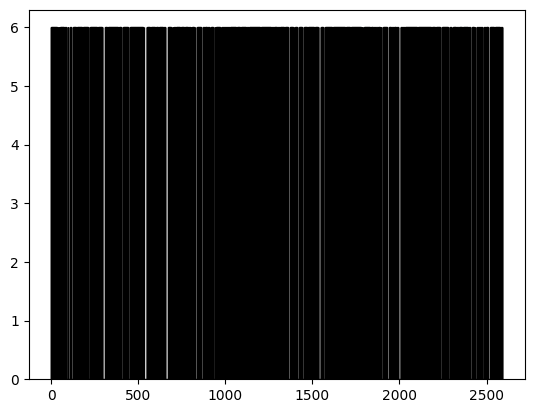

In [45]:
plt.hist(list(np.array(train_dataset[train_dataset["product_id"] == 401920]["dt_close"])-8862), bins=2590, color='skyblue', edgecolor='black')

In [56]:
list((train_dataset[train_dataset["product_id"] == 401920]["dt_close"]-0).unique())

[8862,
 8863,
 8864,
 8865,
 8866,
 8867,
 8868,
 8869,
 8870,
 8871,
 8872,
 8873,
 8874,
 8875,
 8876,
 8877,
 8878,
 8879,
 8880,
 8881,
 8882,
 8884,
 8885,
 8886,
 8887,
 8888,
 8889,
 8890,
 8891,
 8892,
 8893,
 8894,
 8900,
 8901,
 8902,
 8906,
 8907,
 8908,
 8909,
 8911,
 8912,
 8913,
 8914,
 8915,
 8916,
 8917,
 8918,
 8919,
 8921,
 8922,
 8923,
 8924,
 8925,
 8926,
 8927,
 8928,
 8929,
 8930,
 8931,
 8932,
 8933,
 8934,
 8935,
 8936,
 8937,
 8944,
 8946,
 8947,
 8948,
 8949,
 8956,
 8957,
 8958,
 8959,
 8960,
 8973,
 8974,
 8975,
 8976,
 8977,
 8990,
 8991,
 8992,
 8993,
 8995,
 8996,
 8997,
 8998,
 8999,
 9000,
 9001,
 9002,
 9003,
 9004,
 9005,
 9006,
 9011,
 9012,
 9013,
 9014,
 9016,
 9017,
 9018,
 9019,
 9020,
 9021,
 9022,
 9023,
 9024,
 9025,
 9026,
 9027,
 9028,
 9029,
 9030,
 9031,
 9032,
 9033,
 9034,
 9035,
 9036,
 9037,
 9046,
 9047,
 9048,
 9049,
 9050,
 9051,
 9052,
 9053,
 9054,
 9055,
 9056,
 9057,
 9058,
 9059,
 9060,
 9061,
 9062,
 9063,
 9064,
 9065,
 9066,

In [57]:
list(X_test[X_test["product_id"] == 401920]["dt_close"].unique())

[8895,
 8896,
 8897,
 8898,
 8899,
 8903,
 8904,
 8938,
 8939,
 8940,
 8941,
 8942,
 8943,
 8950,
 8952,
 8953,
 8954,
 8955,
 8961,
 8962,
 8963,
 8964,
 8965,
 8966,
 8967,
 8968,
 8969,
 8970,
 8971,
 8972,
 8978,
 8980,
 8981,
 8982,
 8983,
 8984,
 8985,
 8986,
 8987,
 8988,
 8989,
 9007,
 9008,
 9009,
 9010,
 9039,
 9040,
 9041,
 9043,
 9044,
 9045,
 9075,
 9076,
 9077,
 9078,
 9079,
 9080,
 9081,
 9082,
 9127,
 9128,
 9129,
 9130,
 9156,
 9157,
 9158,
 9159,
 9160,
 9161,
 9162,
 9163,
 9164,
 9165,
 9167,
 9168,
 9169,
 9170,
 9172,
 9183,
 9184,
 9186,
 9187,
 9194,
 9195,
 9196,
 9247,
 9248,
 9249,
 9250,
 9251,
 9266,
 9267,
 9268,
 9269,
 9270,
 9271,
 9272,
 9273,
 9274,
 9305,
 9306,
 9307,
 9308,
 9309,
 9310,
 9311,
 9312,
 9313,
 9353,
 9354,
 9355,
 9356,
 9357,
 9382,
 9383,
 9384,
 9392,
 9393,
 9394,
 9395,
 9396,
 9398,
 9399,
 9400,
 9401,
 9402,
 9403,
 9404,
 9405,
 9406,
 9407,
 9409,
 9410,
 9416,
 9417,
 9418,
 9419,
 9420,
 9460,
 9461,
 9462,
 9463,
 9464,

In [16]:
set(X_train.product_id.unique()) - set(X_test.product_id.unique())

{42886656, 63489024}

In [92]:
print(len(X_train))
print(len(y_train))


l1 = list(y_train.ID)
l2 = list(X_train.ID)

print(len(l1) - len(l2))

for i in range(len(l1)):
    if l1[i] != l2[i]:
        print("mismatch found!")

print("reached end")

629611
629611
0
reached end


In [27]:
lis = [(prod_id, len(X_train[X_train["product_id"] == prod_id])) for prod_id in X_train.product_id.unique()]
lis.sort(key=lambda x: x[1], reverse=True)
lis

[(150659072, 21912),
 (190060032, 20372),
 (42886656, 14706),
 (102103552, 14568),
 (58466816, 14408),
 (1470464, 14348),
 (165224448, 14088),
 (168198656, 14071),
 (191722496, 13992),
 (86361600, 13974),
 (99369472, 13935),
 (174323712, 13928),
 (84234240, 13920),
 (1970176, 13864),
 (134256128, 13688),
 (145622016, 12915),
 (130039296, 12600),
 (86484480, 12397),
 (32823296, 12257),
 (198575104, 11960),
 (44702208, 10948),
 (138064896, 10869),
 (126449664, 10792),
 (113155584, 10632),
 (401920, 10566),
 (63489024, 10044),
 (84796928, 9025),
 (148057088, 8845),
 (126553600, 8228),
 (168709120, 7368),
 (180831232, 7256),
 (109380096, 7127),
 (184466432, 7108),
 (161763840, 7041),
 (18077696, 6916),
 (195589120, 6916),
 (5940224, 6840),
 (47451136, 6714),
 (69079040, 6592),
 (191575552, 6532),
 (72734208, 6210),
 (127007744, 5487),
 (111476224, 5247),
 (33075712, 3832),
 (197860864, 3756),
 (17157120, 3730),
 (75106304, 3721),
 (56024576, 3711),
 (193449984, 3710),
 (174252032, 3708),
 

In [28]:
ids = []
num_data_points = []
for item in lis:
    ids.append(item[0])
    num_data_points.append(item[1])

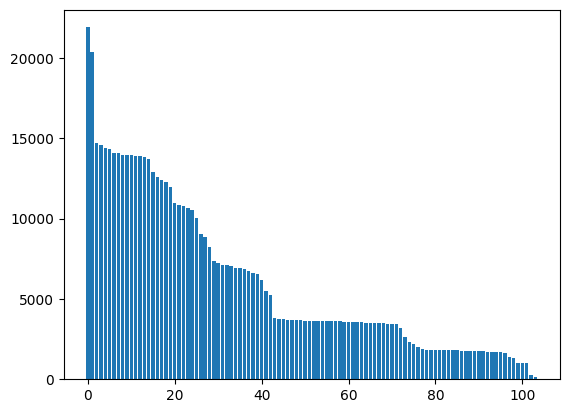

In [43]:
df = pd.DataFrame({"ids": ids, "num_data_points":num_data_points})
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# sns.barplot(
#     data= df,
#     y= 'ids',
#     x= 'num_data_points')

y_pos = np.arange(len(ids))

plt.bar(y_pos, num_data_points, align='center')

plt.show()

In [50]:
sample = X_train[X_train.product_id==199478784]
sample

,ID,dt_close,product_id,liquidity_rank,normal_trading_day,dt_expiry,open,high,low,close,open_interest,volume,tick_size,fixed
572489,772398,11197,199478784,0,1,11213,5010.0,5058.0,4978.0,5048.0,2367,99,13,0
572736,772761,11198,199478784,0,1,11213,5056.0,5135.0,5056.0,5127.0,2412,128,13,0
572996,773112,11199,199478784,0,1,11213,5122.0,5153.0,5109.0,5109.0,2377,26,13,0
573260,773456,11200,199478784,0,1,11213,5109.0,5172.0,5109.0,5149.0,2667,126,13,0
573805,774172,11202,199478784,0,1,11213,5143.0,5153.0,5119.0,5128.0,2767,48,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626595,855915,11440,199478784,0,1,11452,6975.0,6981.0,6926.0,6970.0,1713,296,13,0
628293,858597,11448,199478784,0,1,11452,6782.0,6818.0,6759.0,6795.0,1683,461,13,0
628641,858945,11449,199478784,0,1,11452,6820.0,6857.0,6796.0,6842.0,1287,863,13,0
628982,859286,11450,199478784,0,1,11452,6863.0,6890.0,6822.0,6868.0,830,1186,13,0


In [126]:
sample.dt_expiry.unique()

array([11213, 11234, 11257, 11278, 11298, 11321, 11343, 11364, 11386,
       11408, 11430, 11452, 11473])

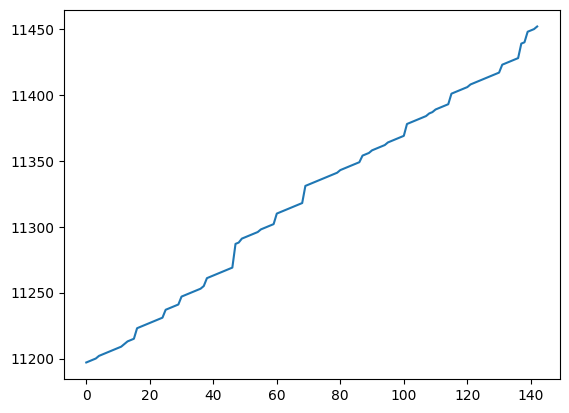

In [64]:
plt.plot(list(sample.dt_close))

In [74]:
(sample.liquidity_rank).unique()

array([0])

In [94]:
sample_test_set.head(20)

,ID,dt_close,product_id,liquidity_rank,normal_trading_day,dt_expiry,open,high,low,close,open_interest,volume,tick_size,fixed
201632,779102,11216,199478784,0,1,11234,4982.0,5028.0,4980.0,5028.0,4619,424,13,0
201709,779467,11217,199478784,0,1,11234,5023.0,5113.0,5018.0,5101.0,4405,563,13,0
201768,779832,11218,199478784,0,1,11234,5133.0,5146.0,5078.0,5146.0,3574,220,13,0
201835,780197,11219,199478784,0,1,11234,5249.0,5249.0,5115.0,5158.0,3809,519,13,0
201891,780562,11220,199478784,0,1,11234,5211.0,5229.0,5169.0,5198.0,4865,328,13,0
201963,780927,11221,199478784,0,1,11234,5191.0,5198.0,5148.0,5196.0,4335,283,13,0
202039,781269,11222,199478784,0,1,11234,5190.0,5253.0,5169.0,5241.0,4665,243,13,0
202684,784825,11232,199478784,0,1,11234,5470.0,5560.0,5444.0,5471.0,1766,1528,13,0
202765,785360,11234,199478784,0,0,11257,5443.0,5501.0,5443.0,5488.0,3535,258,13,0
202817,785725,11235,199478784,0,1,11257,5466.0,5529.0,5377.0,5428.0,2998,831,13,0


In [69]:
sample.head(60)

,ID,dt_close,product_id,liquidity_rank,normal_trading_day,dt_expiry,open,high,low,close,open_interest,volume,tick_size,fixed
572489,772398,11197,199478784,0,1,11213,5010.0,5058.0,4978.0,5048.0,2367,99,13,0
572736,772761,11198,199478784,0,1,11213,5056.0,5135.0,5056.0,5127.0,2412,128,13,0
572996,773112,11199,199478784,0,1,11213,5122.0,5153.0,5109.0,5109.0,2377,26,13,0
573260,773456,11200,199478784,0,1,11213,5109.0,5172.0,5109.0,5149.0,2667,126,13,0
573805,774172,11202,199478784,0,1,11213,5143.0,5153.0,5119.0,5128.0,2767,48,13,0
574067,774527,11203,199478784,0,1,11213,5124.0,5128.0,5051.0,5071.0,2675,72,13,0
574332,774880,11204,199478784,0,1,11213,5063.0,5111.0,5048.0,5055.0,1790,30,13,0
574591,775233,11205,199478784,0,1,11213,5088.0,5128.0,5078.0,5122.0,2876,66,13,0
574856,775596,11206,199478784,0,1,11213,5121.0,5121.0,5088.0,5096.0,2139,35,13,0
575135,775959,11207,199478784,0,1,11213,5109.0,5134.0,5082.0,5083.0,2404,90,13,0


In [93]:
sample_test_set = X_test[X_test.product_id==199478784]

In [112]:
# with pd.option_context('display.max_rows', None,):
#     print(X_train[X_train.product_id==401920].head(200))

In [121]:
# pd.reset_option('all')

In [128]:
len(X_train.dt_expiry.unique())

1660

In [123]:
# pd.set_option('display.max_rows', 500)
X_train[X_train.product_id==401920].head(60)

,ID,dt_close,product_id,liquidity_rank,normal_trading_day,dt_expiry,open,high,low,close,open_interest,volume,tick_size,fixed
0,0,8862,401920,0,1,8952,2710.0,2721.0,2624.0,2635.0,2814,402,11,0
1,1,8862,401920,1,1,8995,2610.0,2638.0,2547.0,2560.0,905,107,11,0
2,2,8862,401920,2,1,9039,2530.0,2550.0,2468.0,2478.0,719,41,11,0
3,3,8862,401920,3,1,9104,2497.0,2508.0,2437.0,2443.0,466,25,11,0
4,4,8862,401920,4,1,9213,2474.0,2505.0,2443.0,2452.0,286,11,11,0
5,5,8862,401920,5,1,9256,2451.0,2460.0,2404.0,2414.0,58,4,11,0
253,253,8863,401920,0,1,8952,2671.0,2709.0,2659.0,2686.0,2496,306,11,0
254,254,8863,401920,1,1,8995,2604.0,2626.0,2584.0,2605.0,771,82,11,0
255,255,8863,401920,2,1,9039,2500.0,2540.0,2500.0,2519.0,618,48,11,0
256,256,8863,401920,3,1,9104,2475.0,2505.0,2474.0,2479.0,398,24,11,0


In [51]:
len(sample.ID.unique())

143

In [56]:
sampleids = list(sample.ID)

In [57]:
selected_rows = y_train[y_train['ID'].isin(sampleids)]

In [60]:
selected_rows

,ID,spread
572489,772398,1.214855
572736,772761,1.050521
572996,773112,1.076427
573260,773456,2.336834
573805,774172,2.006623
...,...,...
626595,855915,1.734715
628293,858597,6.875303
628641,858945,2.308728
628982,859286,2.940817
